# Köstliche asiatische und indische Küche

## Einführung

Asiatische und indische Gerichte sind bekannt für ihre reichen Aromen, vielfältigen Zutaten und einzigartigen Kochtechniken. In diesem Leitfaden erkunden wir einige der beliebtesten Rezepte und geben Tipps, wie man sie zu Hause zubereiten kann.

## Warum asiatische und indische Küche?

Die asiatische und indische Küche bietet eine unglaubliche Vielfalt an Geschmacksrichtungen, die von süß und sauer bis hin zu würzig und herzhaft reichen. Diese Küchen sind nicht nur lecker, sondern auch oft gesund, da sie frische Zutaten und ausgewogene Gewürze verwenden.

## Beliebte Gerichte

### 1. Pad Thai

Pad Thai ist ein klassisches thailändisches Nudelgericht, das oft mit Garnelen, Huhn oder Tofu serviert wird. Es wird mit einer Kombination aus Tamarindensauce, Fischsauce, Zucker und Limettensaft gewürzt.

#### Zutaten:
- Reisnudeln  
- Garnelen, Huhn oder Tofu  
- Tamarindensauce  
- Fischsauce  
- Knoblauch  
- Eier  
- Frühlingszwiebeln  
- Erdnüsse  

#### Zubereitung:
1. Reisnudeln nach Packungsanweisung kochen.  
2. Knoblauch in einer Pfanne anbraten, dann Garnelen, Huhn oder Tofu hinzufügen.  
3. Eier in die Pfanne geben und verrühren.  
4. Gekochte Nudeln und die vorbereitete Sauce hinzufügen.  
5. Mit Frühlingszwiebeln und Erdnüssen garnieren.  

### 2. Butter Chicken

Butter Chicken ist ein cremiges indisches Currygericht, das mit Tomaten, Butter und einer Mischung aus Gewürzen zubereitet wird. Es wird oft mit Naan oder Reis serviert.

#### Zutaten:
- Hähnchenbrust  
- Tomatenpüree  
- Sahne  
- Butter  
- Knoblauch und Ingwer  
- Garam Masala  
- Kurkuma  
- Kreuzkümmel  

#### Zubereitung:
1. Hähnchen in einer Marinade aus Joghurt und Gewürzen einlegen.  
2. Das marinierte Hähnchen anbraten und beiseitestellen.  
3. Tomatenpüree, Butter und Sahne in einer Pfanne erhitzen.  
4. Gewürze hinzufügen und das Hähnchen in die Sauce geben.  
5. Köcheln lassen, bis das Hähnchen zart ist.  

## Tipps für die Zubereitung

- **Frische Zutaten verwenden:** Frische Kräuter und Gewürze machen einen großen Unterschied im Geschmack.  
- **Experimentieren:** Scheuen Sie sich nicht, mit verschiedenen Gewürzen und Zutaten zu experimentieren, um Ihren eigenen Stil zu finden.  
- **Vorbereitung:** Bereiten Sie alle Zutaten im Voraus vor, um den Kochprozess zu erleichtern.  

## Fazit

Die asiatische und indische Küche bietet endlose Möglichkeiten, köstliche und aromatische Gerichte zu kreieren. Mit ein wenig Übung und den richtigen Zutaten können Sie diese Gerichte ganz einfach zu Hause genießen. Probieren Sie es aus und entdecken Sie die Vielfalt dieser wunderbaren Küchen!


Installieren Sie Imblearn, das SMOTE ermöglicht. Dies ist ein Scikit-learn-Paket, das bei der Handhabung unausgeglichener Daten bei der Klassifikation hilft. (https://imbalanced-learn.org/stable/)


In [1]:
pip install imblearn

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from imblearn.over_sampling import SMOTE

In [3]:
df  = pd.read_csv('../../data/cuisines.csv')

Dieses Dataset umfasst 385 Spalten, die alle Arten von Zutaten in verschiedenen Küchen aus einem gegebenen Satz von Küchen anzeigen.


In [4]:
df.head()

Unnamed: 0 cuisine  almond  angelica  anise  anise_seed  apple  \
0          65  indian       0         0      0           0      0   
1          66  indian       1         0      0           0      0   
2          67  indian       0         0      0           0      0   
3          68  indian       0         0      0           0      0   
4          69  indian       0         0      0           0      0   

   apple_brandy  apricot  armagnac  ...  whiskey  white_bread  white_wine  \
0             0        0         0  ...        0            0           0   
1             0        0         0  ...        0            0           0   
2             0        0         0  ...        0            0           0   
3             0        0         0  ...        0            0           0   
4             0        0         0  ...        0            0           0   

   whole_grain_wheat_flour  wine  wood  yam  yeast  yogurt  zucchini  
0                        0     0     0    0      0       0         0  
1                        0     0     0    0      0       0         0  
2                        0     0     0    0      0       0         0  
3                        0     0     0    0      0       0         0  
4                        0     0     0    0      0       1         0  

[5 rows x 385 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Columns: 385 entries, Unnamed: 0 to zucchini
dtypes: int64(384), object(1)
memory usage: 7.2+ MB


In [6]:
df.cuisine.value_counts()

korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: cuisine, dtype: int64

Zeigen Sie die Küchen in einem Balkendiagramm


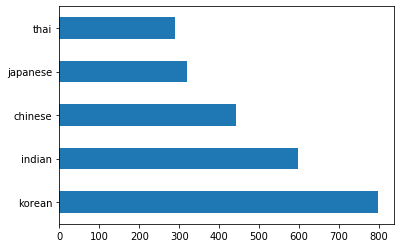

In [7]:
df.cuisine.value_counts().plot.barh()

In [8]:

thai_df = df[(df.cuisine == "thai")]
japanese_df = df[(df.cuisine == "japanese")]
chinese_df = df[(df.cuisine == "chinese")]
indian_df = df[(df.cuisine == "indian")]
korean_df = df[(df.cuisine == "korean")]

print(f'thai df: {thai_df.shape}')
print(f'japanese df: {japanese_df.shape}')
print(f'chinese df: {chinese_df.shape}')
print(f'indian df: {indian_df.shape}')
print(f'korean df: {korean_df.shape}')

thai df: (289, 385)
japanese df: (320, 385)
chinese df: (442, 385)
indian df: (598, 385)
korean df: (799, 385)


In [9]:
def create_ingredient_df(df):
    # transpose df, drop cuisine and unnamed rows, sum the row to get total for ingredient and add value header to new df
    ingredient_df = df.T.drop(['cuisine','Unnamed: 0']).sum(axis=1).to_frame('value')
    # drop ingredients that have a 0 sum
    ingredient_df = ingredient_df[(ingredient_df.T != 0).any()]
    # sort df
    ingredient_df = ingredient_df.sort_values(by='value', ascending=False, inplace=False)
    return ingredient_df


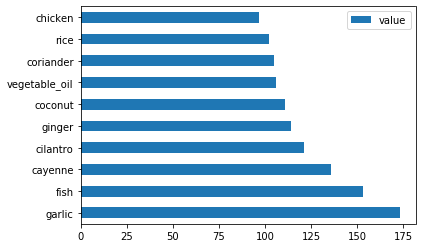

In [10]:
thai_ingredient_df = create_ingredient_df(thai_df)
thai_ingredient_df.head(10).plot.barh()

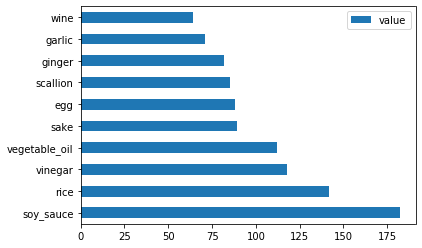

In [11]:
japanese_ingredient_df = create_ingredient_df(japanese_df)
japanese_ingredient_df.head(10).plot.barh()

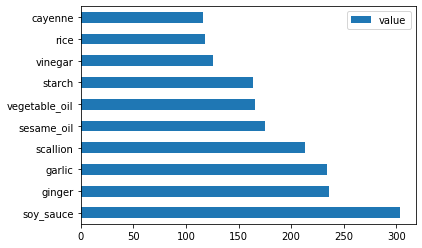

In [12]:
chinese_ingredient_df = create_ingredient_df(chinese_df)
chinese_ingredient_df.head(10).plot.barh()

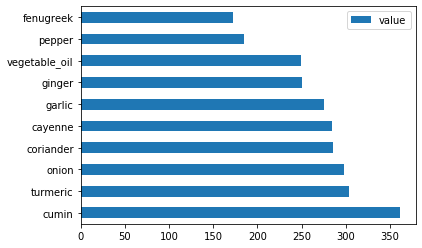

In [13]:
indian_ingredient_df = create_ingredient_df(indian_df)
indian_ingredient_df.head(10).plot.barh()

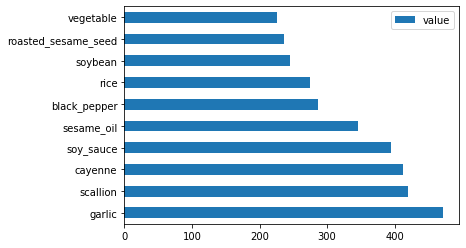

In [14]:
korean_ingredient_df = create_ingredient_df(korean_df)
korean_ingredient_df.head(10).plot.barh()

In [15]:
feature_df= df.drop(['cuisine','Unnamed: 0','rice','garlic','ginger'], axis=1)
labels_df = df.cuisine #.unique()
feature_df.head()


almond  angelica  anise  anise_seed  apple  apple_brandy  apricot  \
0       0         0      0           0      0             0        0   
1       1         0      0           0      0             0        0   
2       0         0      0           0      0             0        0   
3       0         0      0           0      0             0        0   
4       0         0      0           0      0             0        0   

   armagnac  artemisia  artichoke  ...  whiskey  white_bread  white_wine  \
0         0          0          0  ...        0            0           0   
1         0          0          0  ...        0            0           0   
2         0          0          0  ...        0            0           0   
3         0          0          0  ...        0            0           0   
4         0          0          0  ...        0            0           0   

   whole_grain_wheat_flour  wine  wood  yam  yeast  yogurt  zucchini  
0                        0     0     0    0      0       0         0  
1                        0     0     0    0      0       0         0  
2                        0     0     0    0      0       0         0  
3                        0     0     0    0      0       0         0  
4                        0     0     0    0      0       1         0  

[5 rows x 380 columns]

Balancieren Sie Daten mit SMOTE-Oversampling auf die höchste Klasse. Lesen Sie hier mehr: https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.SMOTE.html


In [16]:
oversample = SMOTE()
transformed_feature_df, transformed_label_df = oversample.fit_resample(feature_df, labels_df)

In [17]:
print(f'new label count: {transformed_label_df.value_counts()}')
print(f'old label count: {df.cuisine.value_counts()}')

new label count: korean      799
chinese     799
japanese    799
indian      799
thai        799
Name: cuisine, dtype: int64
old label count: korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: cuisine, dtype: int64


In [18]:
transformed_feature_df.head()

almond  angelica  anise  anise_seed  apple  apple_brandy  apricot  \
0       0         0      0           0      0             0        0   
1       1         0      0           0      0             0        0   
2       0         0      0           0      0             0        0   
3       0         0      0           0      0             0        0   
4       0         0      0           0      0             0        0   

   armagnac  artemisia  artichoke  ...  whiskey  white_bread  white_wine  \
0         0          0          0  ...        0            0           0   
1         0          0          0  ...        0            0           0   
2         0          0          0  ...        0            0           0   
3         0          0          0  ...        0            0           0   
4         0          0          0  ...        0            0           0   

   whole_grain_wheat_flour  wine  wood  yam  yeast  yogurt  zucchini  
0                        0     0     0    0      0       0         0  
1                        0     0     0    0      0       0         0  
2                        0     0     0    0      0       0         0  
3                        0     0     0    0      0       0         0  
4                        0     0     0    0      0       1         0  

[5 rows x 380 columns]

In [19]:
# export transformed data to new df for classification
transformed_df = pd.concat([transformed_label_df,transformed_feature_df],axis=1, join='outer')
transformed_df

cuisine  almond  angelica  anise  anise_seed  apple  apple_brandy  \
0     indian       0         0      0           0      0             0   
1     indian       1         0      0           0      0             0   
2     indian       0         0      0           0      0             0   
3     indian       0         0      0           0      0             0   
4     indian       0         0      0           0      0             0   
...      ...     ...       ...    ...         ...    ...           ...   
3990    thai       0         0      0           0      0             0   
3991    thai       0         0      0           0      0             0   
3992    thai       0         0      0           0      0             0   
3993    thai       0         0      0           0      0             0   
3994    thai       0         0      0           0      0             0   

      apricot  armagnac  artemisia  ...  whiskey  white_bread  white_wine  \
0           0         0          0  ...        0            0           0   
1           0         0          0  ...        0            0           0   
2           0         0          0  ...        0            0           0   
3           0         0          0  ...        0            0           0   
4           0         0          0  ...        0            0           0   
...       ...       ...        ...  ...      ...          ...         ...   
3990        0         0          0  ...        0            0           0   
3991        0         0          0  ...        0            0           0   
3992        0         0          0  ...        0            0           0   
3993        0         0          0  ...        0            0           0   
3994        0         0          0  ...        0            0           0   

      whole_grain_wheat_flour  wine  wood  yam  yeast  yogurt  zucchini  
0                           0     0     0    0      0       0         0  
1                           0     0     0    0      0       0         0  
2                           0     0     0    0      0       0         0  
3                           0     0     0    0      0       0         0  
4                           0     0     0    0      0       1         0  
...                       ...   ...   ...  ...    ...     ...       ...  
3990                        0     0     0    0      0       0         0  
3991                        0     0     0    0      0       0         0  
3992                        0     0     0    0      0       0         0  
3993                        0     0     0    0      0       0         0  
3994                        0     0     0    0      0       0         0  

[3995 rows x 381 columns]

In [20]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3995 entries, 0 to 3994
Columns: 381 entries, cuisine to zucchini
dtypes: int64(380), object(1)
memory usage: 11.6+ MB


Speichern Sie die Datei für die zukünftige Verwendung


In [21]:
transformed_df.to_csv("../../data/cleaned_cuisines.csv")


---

**Haftungsausschluss**:  
Dieses Dokument wurde mithilfe des KI-Übersetzungsdienstes [Co-op Translator](https://github.com/Azure/co-op-translator) übersetzt. Obwohl wir uns um Genauigkeit bemühen, weisen wir darauf hin, dass automatisierte Übersetzungen Fehler oder Ungenauigkeiten enthalten können. Das Originaldokument in seiner ursprünglichen Sprache sollte als maßgebliche Quelle betrachtet werden. Für kritische Informationen wird eine professionelle menschliche Übersetzung empfohlen. Wir übernehmen keine Haftung für Missverständnisse oder Fehlinterpretationen, die aus der Nutzung dieser Übersetzung entstehen.
